In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import MeanShift
from sklearn.metrics import euclidean_distances
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
N = 1000
centers = [[1, 2], [-1, 1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N,
                        n_features=2,
                        centers=centers,
                        cluster_std=[0.5, 0.25, 0.7, 0.5],
                        random_state=0)

In [3]:
euclidean_distances(data)

array([[ 0.        ,  1.67509598,  1.75276461, ...,  3.16921259,
         2.62293023,  1.35668207],
       [ 1.67509598,  0.        ,  3.18537892, ...,  3.96025993,
         2.94714646,  2.74579204],
       [ 1.75276461,  3.18537892,  0.        , ...,  4.27940231,
         4.12139246,  2.2872476 ],
       ..., 
       [ 3.16921259,  3.96025993,  4.27940231, ...,  0.        ,
         1.22906251,  2.00791151],
       [ 2.62293023,  2.94714646,  4.12139246, ...,  1.22906251,
         0.        ,  1.94478294],
       [ 1.35668207,  2.74579204,  2.2872476 , ...,  2.00791151,
         1.94478294,  0.        ]])

In [5]:
euclidean_distances(data).shape

(1000, 1000)

In [14]:
np.median(euclidean_distances(data)[498])


1.5987652824262595

In [4]:
np.median(euclidean_distances(data))

2.0937657834972878

In [23]:
m=euclidean_distances(data)[0]
np.where((m>2.09) & (m<2.1 ))

(array([627, 647], dtype=int64),)

In [27]:
np.median(np.sort(m))

1.5773302838346823

In [25]:
m[647]

2.0991647384414049

bw:  4.3838551562
bw:  0.43838551562 num of clusters:  12
['#ff0000', '#e7d18b', '#d0a317', '#b974a2', '#a2462e', '#8b17b9', '#73e945', '#5cbad0', '#458c5c', '#2e5de7', '#172f73', '#0000ff']
bw:  0.876771031241 num of clusters:  3
['#ff0000', '#7f807f', '#0000ff']
bw:  1.31515654686 num of clusters:  3
['#ff0000', '#7f807f', '#0000ff']
bw:  1.75354206248 num of clusters:  2
['#ff0000', '#0000ff']


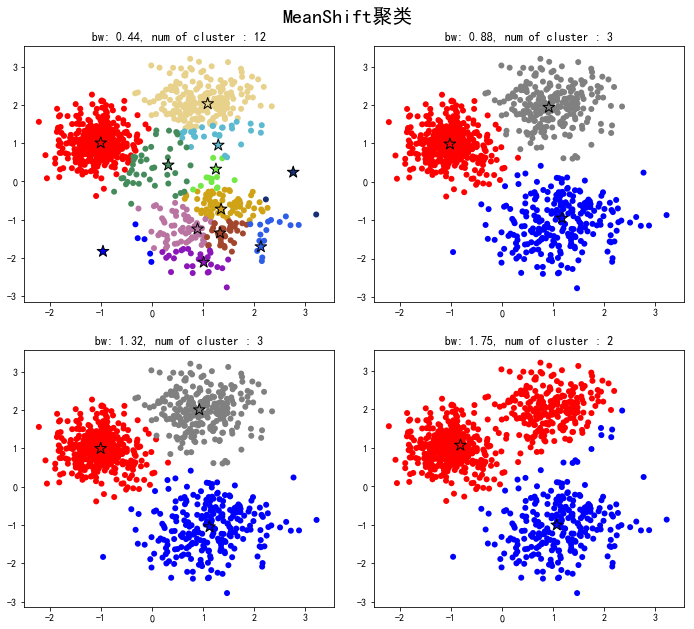

In [3]:
plt.figure(figsize=(10,9),facecolor='w')
m=euclidean_distances(data,squared=True)
bw=np.median(m)
print('bw: ',bw)
for i,mul in enumerate(np.linspace(0.1,0.4,4)):
    band_width=mul*bw
    model=MeanShift(bin_seeding=True,bandwidth=band_width)
    ms=model.fit(data)
    centers=ms.cluster_centers_
    y_hat=ms.labels_
    n_clusters=np.unique(y_hat).size
    print('bw: ',band_width,'num of clusters: ',n_clusters)
    
    plt.subplot(2,2,i+1)
    plt.title('bw: %.2f, num of cluster : %d' %(band_width,n_clusters))
    clrs=[]
    for c in np.linspace(16711680,255,n_clusters):
        clrs.append('#%06x' % int(c))
    print(clrs)
    
    for k,clr in enumerate(clrs):
        cur=(y_hat==k)
        plt.scatter(data[cur,0],data[cur,1],c=clr,edgecolors='none')
    plt.scatter(centers[:,0],centers[:,1],s=150,c=clrs,marker='*',edgecolors='k')
plt.tight_layout(2)
plt.suptitle(u'MeanShift聚类', fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()
